In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('tips.csv')
df

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,NaN,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...,...
239,239,29.03,5.92,Male,No,Sat,Dinner,3
240,240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,242,17.82,1.75,Male,No,Sat,Dinner,2


## 1. Read the tips dataset from the provided source only. Handle the missing values with the appropriate techniques.

# Methods to identity Missing Data
    - .isnull()
    - .notnull()
    - .info()
    - .isna()

In [3]:
# .isnull()
df.isnull().sum()

Unnamed: 0     0
total_bill    39
tip            0
sex            0
smoker         0
day            0
time           0
size           0
dtype: int64

In [4]:
df.isnull().sum().sum()

39

In [5]:
df['total_bill'].isnull().sum()

39

In [6]:
# .notnull()
df.notnull().sum()

Unnamed: 0    244
total_bill    205
tip           244
sex           244
smoker        244
day           244
time          244
size          244
dtype: int64

In [7]:
df.notnull().sum().sum()

1913

In [8]:
df['total_bill'].notnull().sum()

205

In [9]:
# .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  244 non-null    int64  
 1   total_bill  205 non-null    float64
 2   tip         244 non-null    float64
 3   sex         244 non-null    object 
 4   smoker      244 non-null    object 
 5   day         244 non-null    object 
 6   time        244 non-null    object 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB


In [10]:
# .isna()
df.isna().sum()

Unnamed: 0     0
total_bill    39
tip            0
sex            0
smoker         0
day            0
time           0
size           0
dtype: int64

In [11]:
df.isna().sum().sum()

39

# Handle Missing Values

1. Mean, median and Mode imputation 
2. Random sample Imputation
3. Capturing NAN values with a New Feature
4. End of Distribution imputation
5. Arbitarary Imputation
6. Frequent Categories Imputation

# 1. Mean, median and Mode imputation 

In [12]:
m=df["total_bill"].mean()
m

21.36019512195122

In [13]:
df['total_bill']=df['total_bill'].fillna(m)

In [14]:
df

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.990000,1.01,Female,No,Sun,Dinner,2
1,1,21.360195,1.66,Male,No,Sun,Dinner,3
2,2,21.010000,3.50,Male,No,Sun,Dinner,3
3,3,23.680000,3.31,Male,No,Sun,Dinner,2
4,4,24.590000,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...,...
239,239,29.030000,5.92,Male,No,Sat,Dinner,3
240,240,27.180000,2.00,Female,Yes,Sat,Dinner,2
241,241,22.670000,2.00,Male,Yes,Sat,Dinner,2
242,242,17.820000,1.75,Male,No,Sat,Dinner,2


In [15]:
df.isnull().sum()

Unnamed: 0    0
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [16]:
m=df["total_bill"].median()
m

20.965000000000003

In [17]:
m=df["total_bill"].mode()
m

0    21.360195
Name: total_bill, dtype: float64

In [18]:
for col in df.columns:
    print(col,":",len(df[col].unique()),'labels')

Unnamed: 0 : 244 labels
total_bill : 195 labels
tip : 123 labels
sex : 2 labels
smoker : 2 labels
day : 4 labels
time : 2 labels
size : 6 labels


## 2. Handle the categorical data in the tips dataset with the relevant approaches such as label-encoding, one hot encoding, ordinal encoding.

### One Hot Encoding

In [19]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Sample DataFrame
data = pd.DataFrame({
    'sex': ['male', 'female', 'female', 'male', 'female'],
    'smoker': ['yes', 'no', 'yes', 'yes', 'no'],
    'day': ['Sun', 'Sat', 'Sun', 'Sun', 'Sat'],
    'time': ['Dinner', 'Lunch', 'Dinner', 'Dinner', 'Lunch']
})

# Create one-hot encoder object
encoder = OneHotEncoder()

encoder.fit(data[['sex', 'smoker', 'day', 'time']])

# Transform the data
onehot_encoded = encoder.transform(data[['sex', 'smoker', 'day', 'time']])

onehot_encoded_df = pd.DataFrame(onehot_encoded.toarray(), columns=encoder.get_feature_names_out(['sex', 'smoker', 'day', 'time']))

print(onehot_encoded_df)

   sex_female  sex_male  smoker_no  smoker_yes  day_Sat  day_Sun  time_Dinner  \
0         0.0       1.0        0.0         1.0      0.0      1.0          1.0   
1         1.0       0.0        1.0         0.0      1.0      0.0          0.0   
2         1.0       0.0        0.0         1.0      0.0      1.0          1.0   
3         0.0       1.0        0.0         1.0      0.0      1.0          1.0   
4         1.0       0.0        1.0         0.0      1.0      0.0          0.0   

   time_Lunch  
0         0.0  
1         1.0  
2         0.0  
3         0.0  
4         1.0  


In [20]:
categorical_columns = ['sex', 'smoker', 'day', 'time']

# Create one-hot encoder object
encoder = OneHotEncoder()

# Fit encoder to the selected categorical columns
encoder.fit(df[categorical_columns])

# Transform the selected categorical columns
onehot_encoded = encoder.transform(df[categorical_columns])

# Convert sparse matrix to array and convert to DataFrame
onehot_encoded_df = pd.DataFrame(onehot_encoded.toarray(), columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded DataFrame with the non-categorical columns
final_df = pd.concat([df.drop(columns=categorical_columns), onehot_encoded_df], axis=1)
final_df

,Unnamed: 0,total_bill,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,0,16.990000,1.01,2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,21.360195,1.66,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,2,21.010000,3.50,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,3,23.680000,3.31,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,4,24.590000,3.61,4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,239,29.030000,5.92,3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
240,240,27.180000,2.00,2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
241,241,22.670000,2.00,2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
242,242,17.820000,1.75,2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## 3. Perform feature scaling techniques such as min-max normalization, standardization, z-score, on the tips dataset.

In [21]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import scale

# Load the dataset
df = pd.read_csv('tips.csv')

# Display the first few rows of the dataset
print(df.head())

numerical_cols = ['total_bill', 'tip', 'size']
numerical_data = df[numerical_cols]

min_max_scaler = MinMaxScaler()
min_max_scaled_data = min_max_scaler.fit_transform(numerical_data)

standard_scaler = StandardScaler()
standard_scaled_data = standard_scaler.fit_transform(numerical_data)

z_score_scaled_data = scale(numerical_data)

min_max_scaled_df = pd.DataFrame(min_max_scaled_data, columns=numerical_cols)
standard_scaled_df = pd.DataFrame(standard_scaled_data, columns=numerical_cols)
z_score_scaled_df = pd.DataFrame(z_score_scaled_data, columns=numerical_cols)

print("\nMin-Max Scaled Data:")
print(min_max_scaled_df.head())

print("\nStandard Scaled Data:")
print(standard_scaled_df.head())

print("\nZ-Score Scaled Data:")
print(z_score_scaled_df.head())

   Unnamed: 0  total_bill   tip     sex smoker  day    time  size
0           0       16.99  1.01  Female     No  Sun  Dinner     2
1           1         NaN  1.66    Male     No  Sun  Dinner     3
2           2       21.01  3.50    Male     No  Sun  Dinner     3
3           3       23.68  3.31    Male     No  Sun  Dinner     2
4           4       24.59  3.61  Female     No  Sun  Dinner     4

Min-Max Scaled Data:
   total_bill       tip  size
0    0.291579  0.001111   0.2
1         NaN  0.073333   0.4
2    0.375786  0.277778   0.4
3    0.431713  0.256667   0.2
4    0.450775  0.290000   0.6

Standard Scaled Data:
   total_bill       tip      size
0   -0.494024 -1.439947 -0.600193
1         NaN -0.969205  0.453383
2   -0.039587  0.363356  0.453383
3    0.262240  0.225754 -0.600193
4    0.365110  0.443020  1.506958

Z-Score Scaled Data:
   total_bill       tip      size
0   -0.494024 -1.439947 -0.600193
1         NaN -0.969205  0.453383
2   -0.039587  0.363356  0.453383
3    0.262240  0.

In [22]:
from sklearn.preprocessing import StandardScaler

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Initialize StandardScaler
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df[numerical_cols])
df_scaled = pd.DataFrame(df_scaled, columns=numerical_cols)

print(df_scaled.head())

   Unnamed: 0  total_bill       tip      size
0   -1.724967   -0.494024 -1.439947 -0.600193
1   -1.710769         NaN -0.969205  0.453383
2   -1.696572   -0.039587  0.363356  0.453383
3   -1.682375    0.262240  0.225754 -0.600193
4   -1.668178    0.365110  0.443020  1.506958


In [23]:
pd.DataFrame(df_scaled)

,Unnamed: 0,total_bill,tip,size
0,-1.724967,-0.494024,-1.439947,-0.600193
1,-1.710769,NaN,-0.969205,0.453383
2,-1.696572,-0.039587,0.363356,0.453383
3,-1.682375,0.262240,0.225754,-0.600193
4,-1.668178,0.365110,0.443020,1.506958
...,...,...,...,...
239,1.668178,0.867025,2.115963,0.453383
240,1.682375,0.657894,-0.722971,-0.600193
241,1.696572,0.148065,-0.722971,-0.600193
242,1.710769,-0.400198,-0.904026,-0.600193


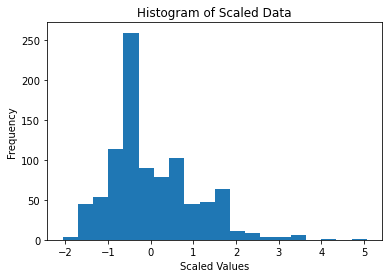

In [24]:
import matplotlib.pyplot as plt

# Convert DataFrame to NumPy array
scaled_array = df_scaled.to_numpy()

# Flatten the scaled array
scaled_values = scaled_array.flatten()

# Plot the histogram
plt.hist(scaled_values, bins=20)
plt.xlabel('Scaled Values')
plt.ylabel('Frequency')
plt.title('Histogram of Scaled Data')
plt.show()

## 4. Create a new feature representing the average tip percentage for each dining party size.

#### To create a new feature representing the average tip percentage for each dining party size, you can use the following steps:

#### 1.Calculate the tip percentage for each row, which is (tip / total_bill) * 100.
#### 2.Group the data by the dining party size.
#### 3.Calculate the average tip percentage for each group.

In [25]:
df['tip_percentage'] = df['tip'] / df['total_bill'] * 100
average_tip_percentage = df['tip_percentage'].mean()
print("Average tip percentage:", average_tip_percentage)

Average tip percentage: 15.992653195779914


In [26]:
average_tip_percentage = df['tip_percentage'].mean()

average_tip_percentage_by_size = df.groupby('size')['tip_percentage'].mean()

new_feature_df = pd.DataFrame({
    'size': average_tip_percentage_by_size.index,
    'avg_tip_percentage_by_size': average_tip_percentage_by_size.values
})

df = pd.merge(df, new_feature_df, on='size', how='left')

df

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size,tip_percentage,avg_tip_percentage_by_size
0,0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673,16.587698
1,1,NaN,1.66,Male,No,Sun,Dinner,3,NaN,15.165983
2,2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734,15.165983
3,3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041,16.587698
4,4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765,14.594901
...,...,...,...,...,...,...,...,...,...,...
239,239,29.03,5.92,Male,No,Sat,Dinner,3,20.392697,15.165983
240,240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.358352,16.587698
241,241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.822232,16.587698
242,242,17.82,1.75,Male,No,Sat,Dinner,2,9.820426,16.587698


## 5. Create a new feature based on total bill and tips if total bill is greater than 10(dollars) and tips is greater than 3(dollars) mark as Highest-bills-with-tips otherwise Normal-bills

In [27]:
import numpy as np

df['bill_tip_category'] = np.where((df['total_bill'] > 10) & (df['tip'] > 3), 'Highest-bills-with-tips', 'Normal-bills')

df

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size,tip_percentage,avg_tip_percentage_by_size,bill_tip_category
0,0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673,16.587698,Normal-bills
1,1,NaN,1.66,Male,No,Sun,Dinner,3,NaN,15.165983,Normal-bills
2,2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734,15.165983,Highest-bills-with-tips
3,3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041,16.587698,Highest-bills-with-tips
4,4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765,14.594901,Highest-bills-with-tips
...,...,...,...,...,...,...,...,...,...,...,...
239,239,29.03,5.92,Male,No,Sat,Dinner,3,20.392697,15.165983,Highest-bills-with-tips
240,240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.358352,16.587698,Normal-bills
241,241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.822232,16.587698,Normal-bills
242,242,17.82,1.75,Male,No,Sat,Dinner,2,9.820426,16.587698,Normal-bills
